In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Superstore.csv', encoding='ISO-8859-1')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [3]:
# Step 1: Convert to datetime using current format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')

# Step 2: Convert back to string in desired format (DD/MM/YYYY)
df['Order Date'] = df['Order Date'].dt.strftime('%d/%m/%Y')
df['Ship Date'] = df['Ship Date'].dt.strftime('%d/%m/%Y')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12/06/2016,16/06/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,21/01/2014,23/01/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,26/02/2017,03/03/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,26/02/2017,03/03/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,26/02/2017,03/03/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [6]:
null_or_empty_counts = df.apply(lambda x: x.isna().sum() + (x == '').sum())
print(null_or_empty_counts)


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [7]:
def format_k_m(value):
    if value >= 1_000_000:
        return f'{value/1_000_000:.2f}M'
    elif value >= 1_000:
        return f'{value/1_000:.2f}K'
    else:
        return f'{value:.2f}'

In [9]:
# Group by Category and sum Sales
category_sales = df.groupby('Category')['Sales'].sum().reset_index()
category_sales

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


C:\Users\karmv\AppData\Local\Temp\ipykernel_38536\1804655619.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=category_sales, x='Sales', y='Category', palette='viridis')


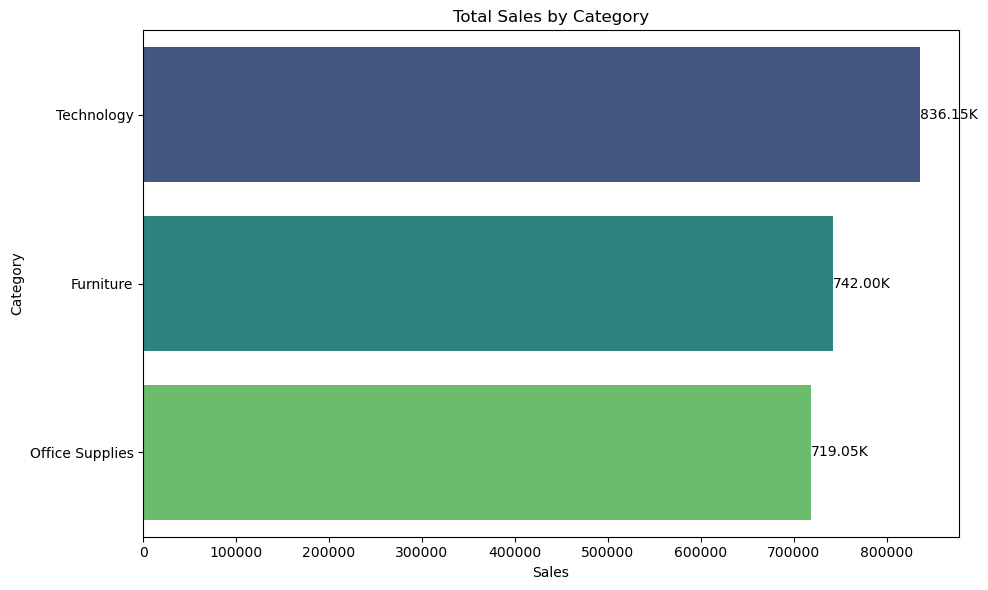

In [10]:
# Group by Category and sum Sales
category_sales = df.groupby('Category')['Sales'].sum().reset_index()

# Sort values for better readability
category_sales = category_sales.sort_values(by='Sales', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=category_sales, x='Sales', y='Category', palette='viridis')

# Add formatted values on bars
for index, value in enumerate(category_sales['Sales']):
    plt.text(value + 100, index, format_k_m(value), va='center')

# Titles and labels
plt.title('Total Sales by Category')
plt.xlabel('Sales')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

In [25]:
# Group, sort, and take top 5
top5_subcat_sales['Sales'] = top5_subcat_sales['Sales'].apply(format_k_m)
top5_subcat_sales


,Sub-Category,Sales
13,Phones,330.01K
5,Chairs,328.45K
14,Storage,223.84K
16,Tables,206.97K
3,Binders,203.41K


C:\Users\karmv\AppData\Local\Temp\ipykernel_38536\3145622151.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=top5_subcat_sales, x='Sales', y='Sub-Category', palette='coolwarm')


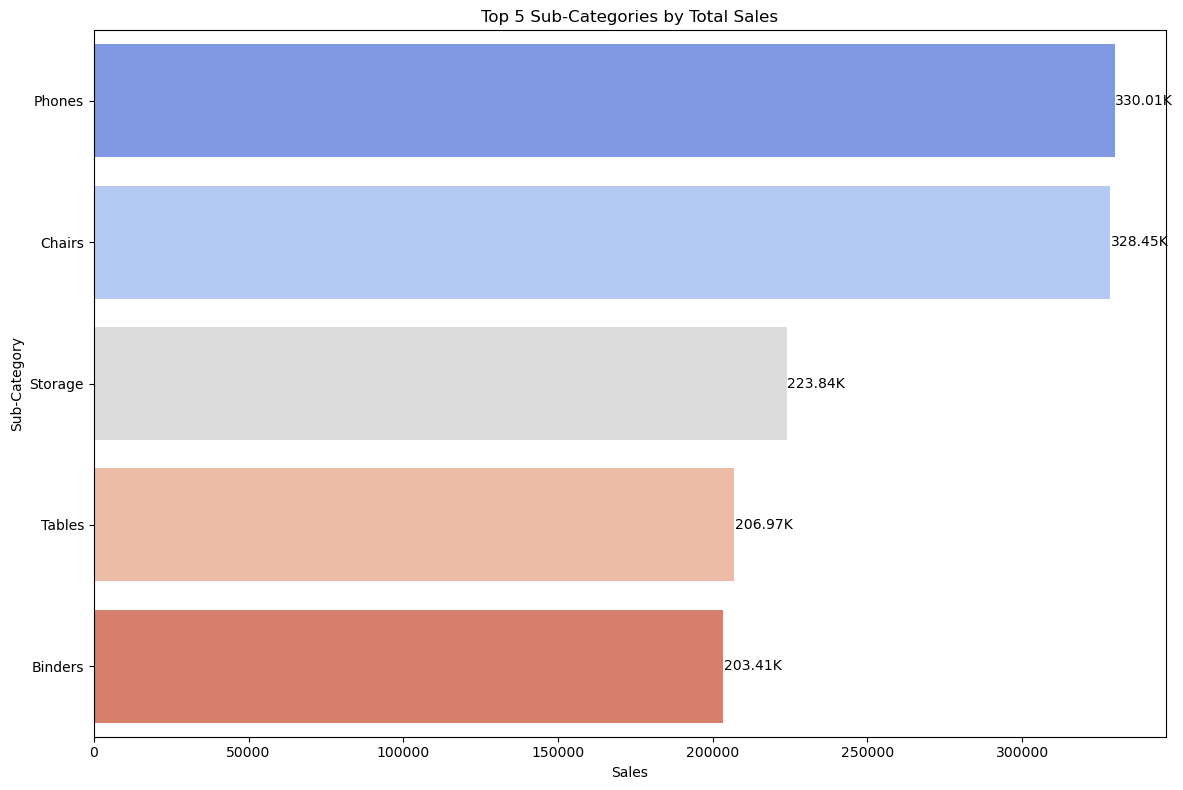

In [20]:
# Group by Sub-Category and sum Sales
subcat_sales = df.groupby('Sub-Category')['Sales'].sum().reset_index()

# Get Top 5 sub-categories by sales
top5_subcat_sales = subcat_sales.sort_values(by='Sales', ascending=False).head(5)

# Optional: Sort for horizontal bar readability
top5_subcat_sales = top5_subcat_sales.sort_values(by='Sales', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
barplot = sns.barplot(data=top5_subcat_sales, x='Sales', y='Sub-Category', palette='coolwarm')

# Add formatted sales values on bars
for index, value in enumerate(top5_subcat_sales['Sales']):
    plt.text(value + 100, index, format_k_m(value), va='center')

# Titles and labels
plt.title('Top 5 Sub-Categories by Total Sales')
plt.xlabel('Sales')
plt.ylabel('Sub-Category')
plt.tight_layout()
plt.show()


In [24]:
shipmode_sales['Sales'] = shipmode_sales['Sales'].apply(format_k_m)
shipmode_sales


,Ship Mode,Sales
3,Standard Class,1.36M
2,Second Class,459.19K
0,First Class,351.43K
1,Same Day,128.36K


C:\Users\karmv\AppData\Local\Temp\ipykernel_13756\1143882614.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=category_sales, x='Sales', y='Ship Mode', palette='viridis')


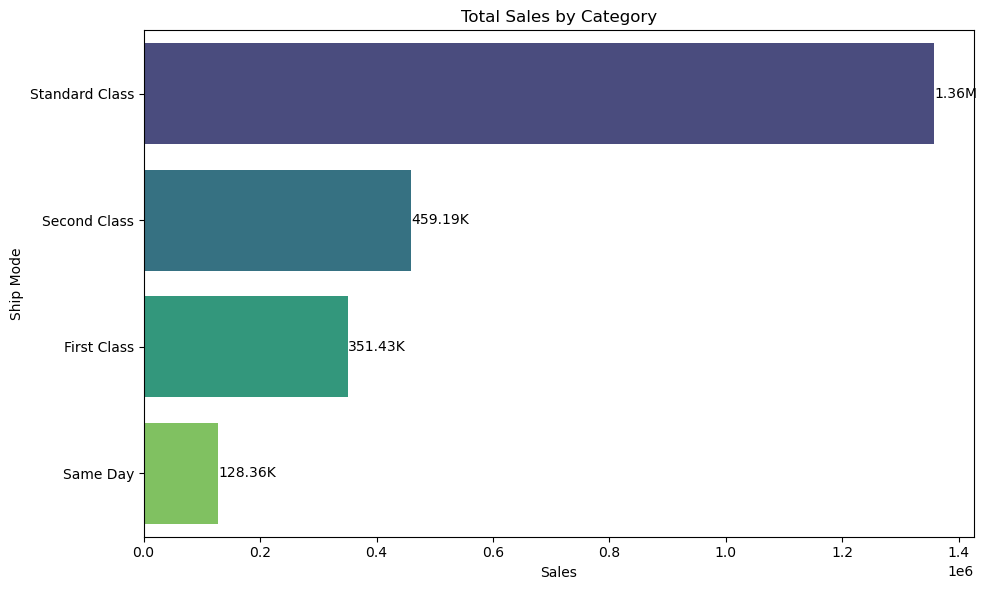

In [12]:
# Group by Category and sum Sales
category_sales = df.groupby('Ship Mode')['Sales'].sum().reset_index()

# Sort values for better readability
category_sales = category_sales.sort_values(by='Sales', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=category_sales, x='Sales', y='Ship Mode', palette='viridis')

# Add formatted values on bars
for index, value in enumerate(category_sales['Sales']):
    plt.text(value + 100, index, format_k_m(value), va='center')

# Titles and labels
plt.title('Total Sales by Category')
plt.xlabel('Sales')
plt.ylabel('Ship Mode')
plt.tight_layout()
plt.show()

In [27]:
# Extract Year-Month
df['YearMonth'] = df['Order Date'].dt.to_period('M').astype(str)

sales_by_monthyear = (
    df.groupby('YearMonth')['Sales']
    .sum()
    .reset_index()
    .sort_values(by='YearMonth')
)

sales_by_monthyear


,YearMonth,Sales
0,2014-01,14236.8950
1,2014-02,4519.8920
2,2014-03,55691.0090
3,2014-04,28295.3450
4,2014-05,23648.2870
5,2014-06,34595.1276
6,2014-07,33946.3930
7,2014-08,27909.4685
8,2014-09,81777.3508
9,2014-10,31453.3930


In [35]:
# Extract Month-Year
df['Month_Year'] = df['Order Date'].dt.to_period('M').astype(str)

# Group by Month-Year and sum Profit
profit_by_monthyear = (
    df.groupby('Month_Year')['Profit']
    .sum()
    .reset_index()
    .sort_values(by='Month_Year')
)

# Display table
profit_by_monthyear

,Month_Year,Profit
0,2014-01,2450.1907
1,2014-02,862.3084
2,2014-03,498.7299
3,2014-04,3488.8352
4,2014-05,2738.7096
5,2014-06,4976.5244
6,2014-07,-841.4826
7,2014-08,5318.1050
8,2014-09,8328.0994
9,2014-10,3448.2573


C:\Users\karmv\AppData\Local\Temp\ipykernel_38536\2869267234.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()


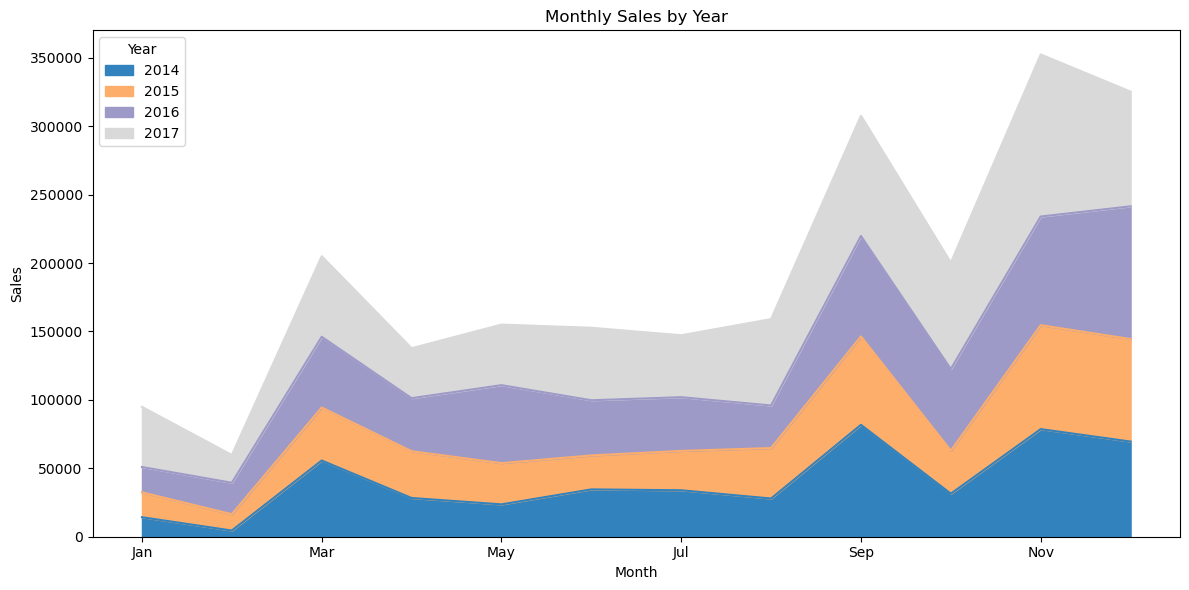

In [36]:
# Ensure Order Date is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')

# Extract Year and Month Name
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.strftime('%b')

# Order months for correct plotting
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

# Group by Year and Month
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Pivot for stacked area chart
pivot_sales = monthly_sales.pivot(index='Month', columns='Year', values='Sales').fillna(0)

# Plot
pivot_sales.plot(kind='area', stacked=True, figsize=(12, 6), colormap='tab20c')
plt.title('Monthly Sales by Year')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='Year')
plt.tight_layout()
plt.show()


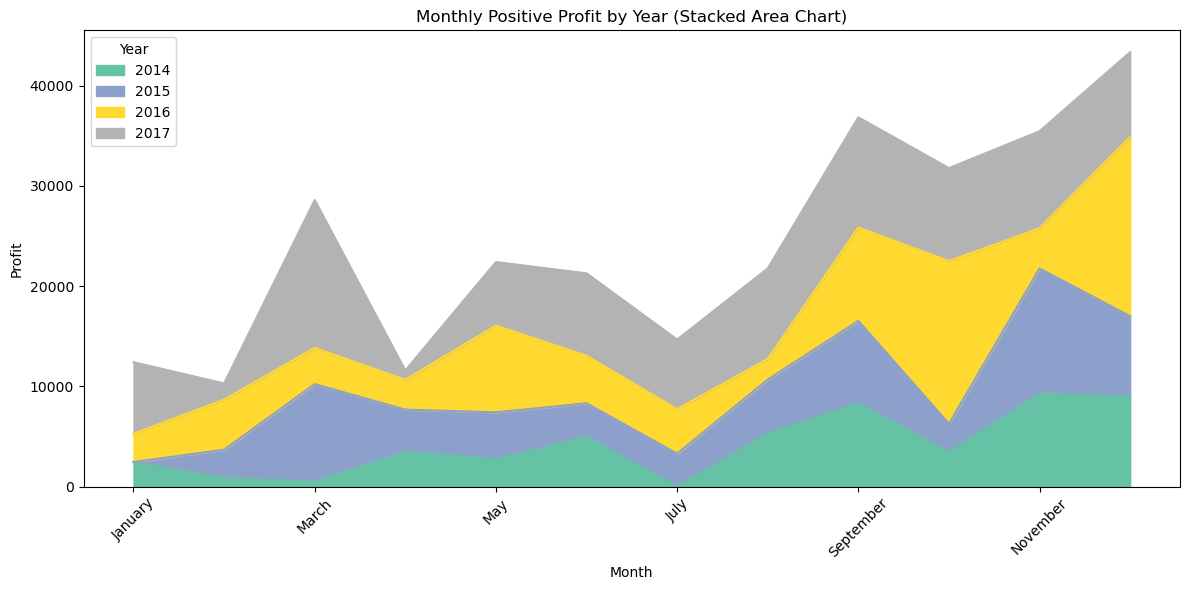

In [38]:
# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract Year and Month name
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month_name()

# Keep month order correct
df['Month'] = pd.Categorical(
    df['Month'],
    categories=[
        'January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November', 'December'
    ],
    ordered=True
)

# Group by Year and Month for Profit
monthly_profit = df.groupby(['Year', 'Month'], observed=True)['Profit'].sum().reset_index()

# Pivot so Months are rows and Years are columns
pivot_profit = monthly_profit.pivot(index='Month', columns='Year', values='Profit')

# Replace negative profits with 0
pivot_profit_positive = pivot_profit.clip(lower=0)

# Plot only positive profit values
pivot_profit_positive.plot(kind='area', stacked=True, figsize=(12, 6), cmap='Set2')
plt.title("Monthly Positive Profit by Year (Stacked Area Chart)")
plt.ylabel("Profit")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [44]:
sales_segment =(
    (df.groupby('Segment')['Sales'].sum() / df['Sales'].sum() * 100)
    .round(2)
    .astype(str) + '%'
).reset_index(name='Percentage')
sales_segment 

,Segment,Percentage
0,Consumer,50.56%
1,Corporate,30.74%
2,Home Office,18.7%


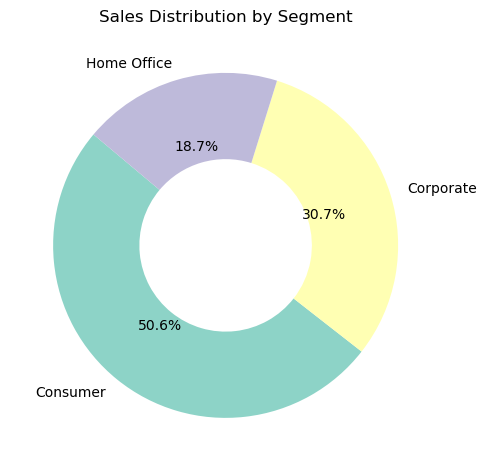

In [45]:
# Group by Segment and sum Sales
segment_sales = df.groupby('Segment')['Sales'].sum()

# Plot a donut chart
plt.figure(figsize=(5, 8))
colors = plt.cm.Set3(range(len(segment_sales)))  # Optional: custom color palette
plt.pie(segment_sales, labels=segment_sales.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'width': 0.5})

plt.title('Sales Distribution by Segment')
plt.tight_layout()
plt.show()

In [46]:
sales_region =(
    (df.groupby('Region')['Sales'].sum() / df['Sales'].sum() * 100)
    .round(2)
    .astype(str) + '%'
).reset_index(name='Percentage')
sales_region 

,Region,Percentage
0,Central,21.82%
1,East,29.55%
2,South,17.05%
3,West,31.58%


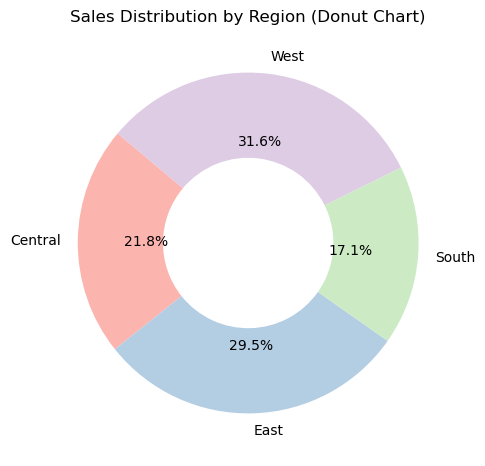

In [47]:
# Group by Region and sum Sales
region_sales = df.groupby('Region')['Sales'].sum()

# Plot a donut chart
plt.figure(figsize=(5, 6))
colors = plt.cm.Pastel1(range(len(region_sales)))  
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=140,
        colors=colors, wedgeprops={'width': 0.5})

plt.title('Sales Distribution by Region (Donut Chart)')
plt.tight_layout()
plt.show()

In [49]:
df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()

,Customer Name,Sales
0,Sean Miller,25043.050
1,Tamara Chand,19052.218
2,Raymond Buch,15117.339
3,Tom Ashbrook,14595.620
4,Adrian Barton,14473.571
5,Ken Lonsdale,14175.229
6,Sanjit Chand,14142.334
7,Hunter Lopez,12873.298
8,Sanjit Engle,12209.438
9,Christopher Conant,12129.072


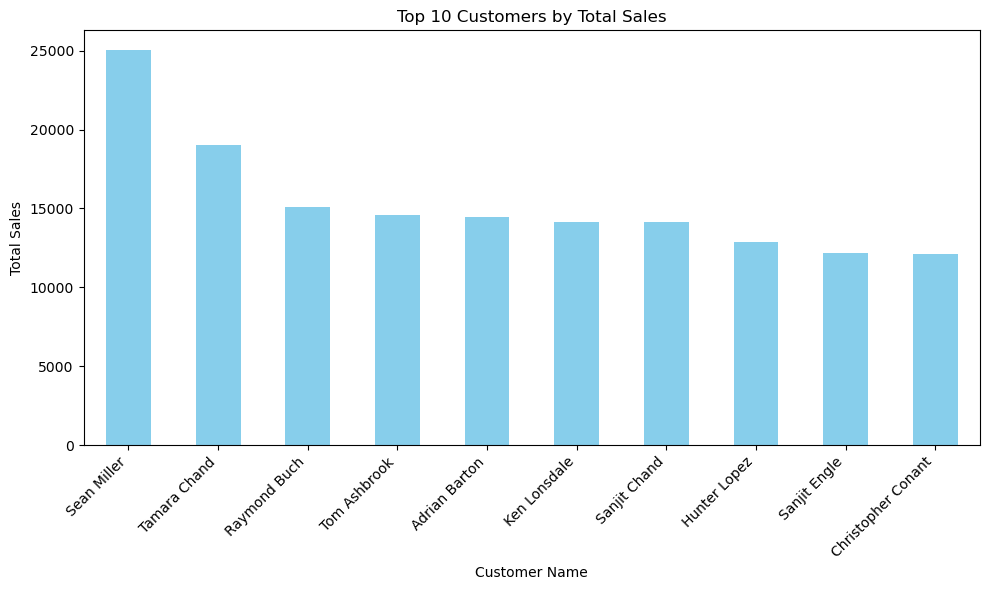

In [50]:
# Group by Customer Name and sum Sales
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)

# Plot bar chart
plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='skyblue')
plt.title('Top 10 Customers by Total Sales')
plt.xlabel('Customer Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()